In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df6 contiene el PIB por sector comunal y la producción comunal por sector, está casi al final del documento

In [2]:
df=pd.read_csv('ENE 2017 12 NDE.csv',sep=';',decimal=",")

C:\Users\maxiv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (25,94,107,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df=df.rename(columns={'b14_rev4cl_caenes':'sector_económico','b18_codigo':'comuna_trabajo',
                      'b18_region':'región','fact':'factor_expansión',
                     'cae_general':'condición_laboral'})

In [4]:
df1=df[['región','comuna_trabajo','sector_económico','condición_laboral','factor_expansión']]

In [5]:
df1.dtypes

región                object
comuna_trabajo        object
sector_económico      object
condición_laboral      int64
factor_expansión     float64
dtype: object

In [6]:
df1.factor_expansión.sum()
df1.condición_laboral.value_counts()
df1.groupby('condición_laboral').factor_expansión.sum()

condición_laboral
0    3.661654e+06
1    7.690548e+06
2    1.611919e+05
3    5.820822e+05
4    5.089483e+05
5    7.829134e+04
6    6.664575e+04
7    1.083541e+04
8    7.571470e+05
9    5.113625e+06
Name: factor_expansión, dtype: float64

In [7]:
#Necesito solo a los ocupados que son 1,2 y3 en condición laboral
df1=df1.loc[((df1.condición_laboral==1)) | ((df1.condición_laboral==2)) |
           ((df1.condición_laboral==3))]
df1.head()
df1['comuna_trabajo']=pd.to_numeric(df1.comuna_trabajo)
df1.dtypes

región                object
comuna_trabajo         int64
sector_económico      object
condición_laboral      int64
factor_expansión     float64
dtype: object

In [8]:
df2=df1.set_index('comuna_trabajo')
df2.head()

,región,sector_económico,condición_laboral,factor_expansión
comuna_trabajo,,,,
6115,6,3,1,124.104859
6115,6,16,1,112.813918
6115,6,1,1,124.104859
6115,6,20,1,124.104859
4301,4,7,1,68.797608


In [9]:
#Asigno los sectores a los bienes del BC

df2.loc[df2['sector_económico']=='1','sector_económico']='Agricultura,silvicultura y pesca'
df2.loc[df2['sector_económico']=='2','sector_económico']='Explotación de minas y canteras'
df2.loc[df2['sector_económico']=='3','sector_económico']='Industria Manufacturera'
df2.loc[df2['sector_económico']=='4','sector_económico']='Suministro de electricidad, gas, vapor y aire acondicionado'
df2.loc[df2['sector_económico']=='5','sector_económico']='Suministro de agua; alcantarillado, gestión de desechos y actividades de saneamiento'
df2.loc[df2['sector_económico']=='6','sector_económico']='Construcción'
df2.loc[df2['sector_económico']=='7','sector_económico']='Comercio'
df2.loc[df2['sector_económico']=='8','sector_económico']='Transporte y almacenamiento'
df2.loc[df2['sector_económico']=='9','sector_económico']='Alojamiento y servicios de comida'
df2.loc[df2['sector_económico']=='10','sector_económico']='Información y comunicación'
df2.loc[df2['sector_económico']=='11','sector_económico']='Actividades financieras y de seguros'
df2.loc[df2['sector_económico']=='12','sector_económico']='Actividades inmobiliarias'
df2.loc[df2['sector_económico']=='13','sector_económico']='Actividades profesionales, científicas y técnicas'
df2.loc[df2['sector_económico']=='14','sector_económico']='Actividades administrativas y servicios de apoyo'
df2.loc[df2['sector_económico']=='15','sector_económico']='Administración Pública'
df2.loc[df2['sector_económico']=='16','sector_económico']='Enseñanza'
df2.loc[df2['sector_económico']=='17','sector_económico']='Servicios sociales y relacionados con la salud humana'
df2.loc[df2['sector_económico']=='18','sector_económico']='Artes, entretenimiento y recreación'
df2.loc[df2['sector_económico']=='19','sector_económico']='Otras actividades de servicios'
df2.loc[df2['sector_económico']=='20','sector_económico']='Actividades de los hogares en calidad de empleadores'
df2.loc[df2['sector_económico']=='21','sector_económico']='Actividades de organizaciones y órganos extraterritoriales'

In [10]:
df2.head()

,región,sector_económico,condición_laboral,factor_expansión
comuna_trabajo,,,,
6115,6,Industria Manufacturera,1,124.104859
6115,6,Enseñanza,1,112.813918
6115,6,"Agricultura,silvicultura y pesca",1,124.104859
6115,6,Actividades de los hogares en calidad de emple...,1,124.104859
4301,4,Comercio,1,68.797608


In [12]:
df2=df2.rename(index={5101: 'Valparaíso',5102:'Casablanca',5103:'Concón',5104:'Juan Fernández',
                      5105:'Puchuncaví',5107:'Quintero',5109:'Viña del Mar',5201:'Isla de Pascua',
                      5301:'Los Andes',5302:'Calle Larga',5303:'Rinconada',5304:'San Esteban',
                      5401:'La Ligua',5402:'Cabildo',5403:'Papudo',5404:'Petorca',5405:'Zapallar',
                      5501:'Quillota',5502:'Calera',5503:'Hijuelas',5504:'La Cruz',
                      5506:'Nogales',5601:'San Antonio',5602:'Algarrobo',5603:'Cartagena',
                      5604:'El Quisco',5605:'El Tabo',5606:'Santo Domingo',5701:'San Felipe',
                      5702:'Catemu',5703:'Llaillay',5704:'Panquehue',5705:'Putaendo',
                      5706:'Santa María',5801:'Quilpué',5802:'Limache',5803:'Olmué',
                      5804:'Villa Alemana',6101:'Rancagua',6102:'Codegua',6103:'Coinco',
                      6104:'Coltauco',6105:'Doñihue',6106:'Graneros',6107:'Las Cabras',
                      6108:'Machalí',6109:'Malloa',6110:'Mostazal',6111:'Olivar',6112:'Peumo',
                      6113:'Pichidegua',6114:'Quinta de Tilcoco',6115:'Rengo',6116:'Requínoa',
                      6117:'San Vicente',6201:'Pichilemu',6202:'La Estrella',6203:'Litueche',
                      6204:'Marchigüe',6205:'Navidad',6206:'Paredones',6301:'San Fernando',
                      6302:'Chépica',6303:'Chimbarongo',6304:'Lolol',6305:'Nancagua',
                      6306:'Palmilla',6307:'Peralillo',6308:'Placilla',6309:'Pumanque',
                      6310:'Santa Cruz',13101:'Santiago',13102:'Cerrillos',13103:'Cerro Navia',
                      13104:'Conchalí',13105:'El Bosque',13106:'Estación Central',13107:'Huechuraba',
                      13108:'Independencia',13109:'La Cisterna',13110:'La Florida',13111:'La Granja',
                      13112:'La Pintana',13113:'La Reina',13114:'Las Condes',13115:'Lo Barnechea',
                      13116:'Lo Espejo',13117:'Lo Prado',13118:'Macul',13119:'Maipú',13120:'Ñuñoa',
                      13121:'Pedro Aguirre Cerda',13122:'Peñalolén',13123:'Providencia',13124:'Pudahuel',
                      13125:'Quilicura',13126:'Quinta Normal',13127:'Recoleta',13128:'Renca',
                      13129:'San Joaquín',13130:'San Miguel',13131:'San Ramón',13132:'Vitacura',
                      13201:'Puente Alto',13202:'Pirque',13203:'San José de Maipo',13301:'Colina',
                      13302:'Lampa',13303:'Tiltil',13401:'San Bernardo',13402:'Buin',13403:'Calera de Tango',
                      13404:'Paine',13501:'Melipilla',13502:'Alhué',13503:'Curacaví',13504:'María Pinto',
                      13505:'San Pedro',13601:'Talagante',13602:'El Monte',13603:'Isla de Maipo',
                      13604:'Padre Hurtado',13605:'Peñaflor'})
                      

In [13]:
#Ahora saco el total de ocupados por sectores a nivel nacional

df2=df2[['región','sector_económico','condición_laboral','factor_expansión']]
df2.head()
total_ocupados_sector=df2.groupby('sector_económico').factor_expansión.sum()
total_ocupados_sector=pd.DataFrame(total_ocupados_sector)
total_ocupados_sector

,factor_expansión
sector_económico,
Actividades administrativas y servicios de apoyo,2.196231e+05
Actividades de los hogares en calidad de empleadores,3.403686e+05
Actividades de organizaciones y órganos extraterritoriales,2.896792e+03
Actividades financieras y de seguros,1.640485e+05
Actividades inmobiliarias,7.919594e+04
"Actividades profesionales, científicas y técnicas",2.545424e+05
Administración Pública,4.606008e+05
"Agricultura,silvicultura y pesca",8.411468e+05
Alojamiento y servicios de comida,3.598520e+05


In [14]:
#Necesito sacar ponderadores, (ocupados en el sector x de la comuna i)/(ocupados totales del sector x)

ocupados_nacional=df2.groupby(['comuna_trabajo','sector_económico']).factor_expansión.sum()
pd.DataFrame(ocupados_nacional).to_excel('ocupados_nacional_ene.xlsx')
ocupados_nacional=pd.DataFrame(ocupados_nacional)
ocupados_nacional['ponderador_sector']=ocupados_nacional.factor_expansión/total_ocupados_sector.factor_expansión
ocupados_nacional.head()


factor_expansión  \
comuna_trabajo sector_económico                                                       
1101           Actividades administrativas y servicios de apoyo         2315.847980   
               Actividades de los hogares en calidad de emplea...       1907.029802   
               Actividades financieras y de seguros                     2433.784669   
               Actividades inmobiliarias                                1882.311331   
               Actividades profesionales, científicas y técnicas        3575.904863   

                                                                   ponderador_sector  
comuna_trabajo sector_económico                                                       
1101           Actividades administrativas y servicios de apoyo             0.010545  
               Actividades de los hogares en calidad de emplea...           0.005603  
               Actividades financieras y de seguros                         0.014836  
               Actividades inmobiliarias                                    0.023768  
               Actividades profesionales, científicas y técnicas            0.014048

In [15]:
#Ahora Saco ponderadores para el empleo total
ocupados_nacional1=df2.groupby(['comuna_trabajo']).factor_expansión.sum()/total_ocupados_sector.factor_expansión.sum()     
ocupados_nacional1=pd.DataFrame(ocupados_nacional1)
ocupados_nacional1=ocupados_nacional1.rename(columns={'factor_expansión':'ponderador_empleo_total'})
ocupados_nacional1.head()

,ponderador_empleo_total
comuna_trabajo,
1101,0.013640
1107,0.003185
1401,0.001996
1402,0.000018
1403,0.000014


In [41]:
import geopandas as gpd

geo_comunas=gpd.read_file(r'C:\Users\maxiv\Desktop\Economía 200\Comunas_geopandas\Comunas\comunas.shp')
geo_comunas=geo_comunas.loc[((geo_comunas.codregion==5)) | ((geo_comunas.codregion==6)) |
                           ((geo_comunas.codregion==13))]
geo_comunas=geo_comunas.set_index('Comuna')


In [17]:
#Selecciono los datos para la V,VI Y RM

df3=df2.loc[((df2.región=='5')) | ((df2.región=='6')) | ((df2.región=='13'))]
df4=df3.groupby(['comuna_trabajo','región','sector_económico']).factor_expansión.sum()
df4=pd.DataFrame(df4)
df4['ponderador_sector']=df4.factor_expansión/total_ocupados_sector.factor_expansión
df4.head()

factor_expansión  \
comuna_trabajo región sector_económico                                                       
Algarrobo      5      Actividades administrativas y servicios de apoyo          823.586111   
                      Actividades de los hogares en calidad de emplea...        436.739767   
                      Actividades inmobiliarias                                 527.042265   
                      Alojamiento y servicios de comida                         319.527230   
                      Artes, entretenimiento y recreación                       860.010426   

                                                                          ponderador_sector  
comuna_trabajo región sector_económico                                                       
Algarrobo      5      Actividades administrativas y servicios de apoyo             0.003750  
                      Actividades de los hogares en calidad de emplea...           0.001283  
                      Actividades inmobiliarias                                    0.006655  
                      Alojamiento y servicios de comida                            0.000888  
                      Artes, entretenimiento y recreación                          0.008609

In [18]:
df4=df4.rename(index={'comuna_trabajo':'Comuna'},level=2)
df4.head()

factor_expansión  \
comuna_trabajo región sector_económico                                                       
Algarrobo      5      Actividades administrativas y servicios de apoyo          823.586111   
                      Actividades de los hogares en calidad de emplea...        436.739767   
                      Actividades inmobiliarias                                 527.042265   
                      Alojamiento y servicios de comida                         319.527230   
                      Artes, entretenimiento y recreación                       860.010426   

                                                                          ponderador_sector  
comuna_trabajo región sector_económico                                                       
Algarrobo      5      Actividades administrativas y servicios de apoyo             0.003750  
                      Actividades de los hogares en calidad de emplea...           0.001283  
                      Actividades inmobiliarias                                    0.006655  
                      Alojamiento y servicios de comida                            0.000888  
                      Artes, entretenimiento y recreación                          0.008609

In [19]:
geo_comunas.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Provincia,geometry
Comuna,,,,,,,,,,,
Marchigüe,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
Codegua,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
Coinco,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
Coltauco,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
Graneros,34,56156.623059,15,8,6106,6,1.645725e+08,67893.183364,Región del Libertador Bernardo O'Higgins,Cachapoal,"POLYGON ((-7878877.984 -4029572.651, -7878820...."


In [20]:
#Mezclo el DataFrame de la V,VI y RM con datos geoespaciales de comuna para tenerlos y elimino a IPascua Y JFernández

df5=df4.join(geo_comunas.reindex(df4.index, level=0))
df5=df5.loc[(df5.cod_comuna!=5201) & (df5.cod_comuna!=5104)]

<AxesSubplot:>

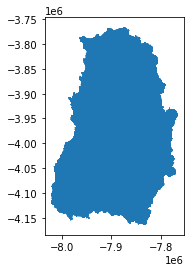

In [21]:
#Me quedo con los datos importantes
df5=df5[['factor_expansión','ponderador_sector','geometry']]
df6=gpd.GeoDataFrame(df5,geometry=df5.geometry)
df6.plot()

In [22]:
#Hago lo mismo para ocupados totales

ocupados_nacional2=ocupados_nacional1.join(geo_comunas.reindex(ocupados_nacional1.index))
ocupados_nacional2=ocupados_nacional2.loc[((ocupados_nacional2.Region=='Región de Valparaíso')) |
                                         ((ocupados_nacional2.Region=='Región Metropolitana de Santiago')) |
                                         ((ocupados_nacional2.Region=="Región del Libertador Bernardo O'Higgins"))]
ocupados_nacional2=ocupados_nacional2.loc[(ocupados_nacional2.cod_comuna!=5201) &
                                         (ocupados_nacional2.cod_comuna!=5104)]
ocupados_nacional2.head(1)
ocupados_nacional2=ocupados_nacional2[['ponderador_empleo_total','geometry','Region']]

In [23]:
ocupados_nacional2=gpd.GeoDataFrame(ocupados_nacional2,geometry='geometry')
ocupados_nacional2.head(1)

,ponderador_empleo_total,geometry,Region
comuna_trabajo,,,
Algarrobo,0.000836,"MULTIPOLYGON (((-7980832.912 -3941619.479, -79...",Región de Valparaíso


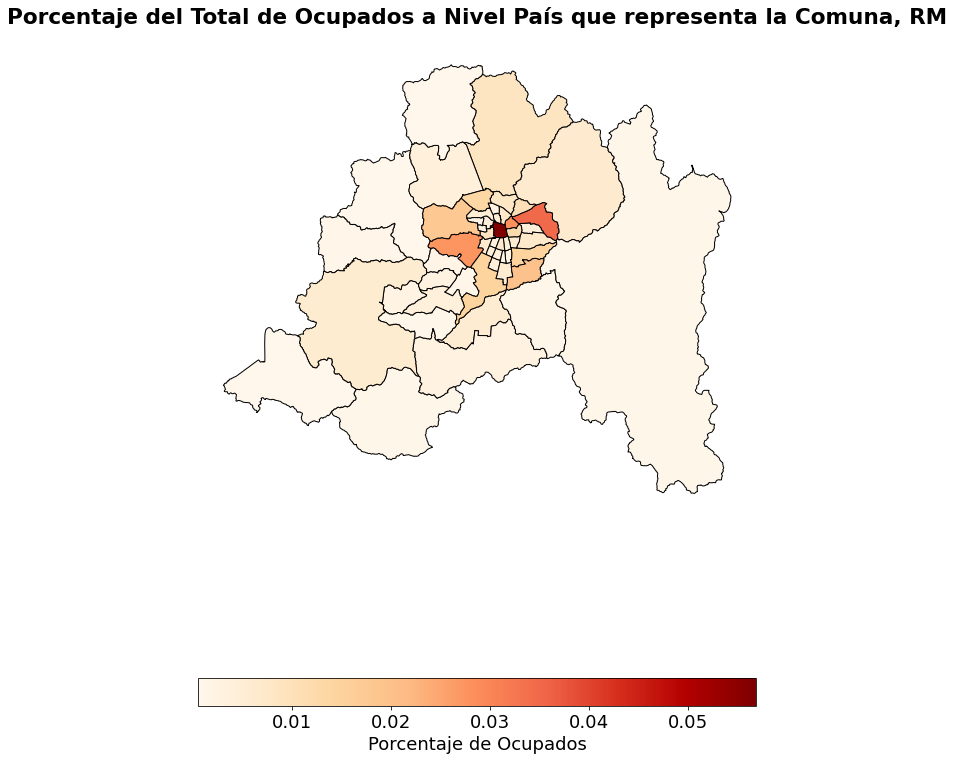

In [49]:
ocupados_nacional2.loc[ocupados_nacional2.Region=='Región Metropolitana de Santiago'].plot(column='ponderador_empleo_total',
                                                                                           cmap='OrRd',
                                                                                           legend=True,figsize=(10,20),edgecolor='black',
                                                                              legend_kwds={'label':'Porcentaje de Ocupados','orientation':'horizontal'})
plt.title('Porcentaje del Total de Ocupados a Nivel País que representa la Comuna, RM',
          fontdict={'fontweight':'bold'},pad=20)
plt.axis('off')
plt.savefig('ocupados_rm.png',dpi=300,bbox_inches = 'tight')
plt.show()


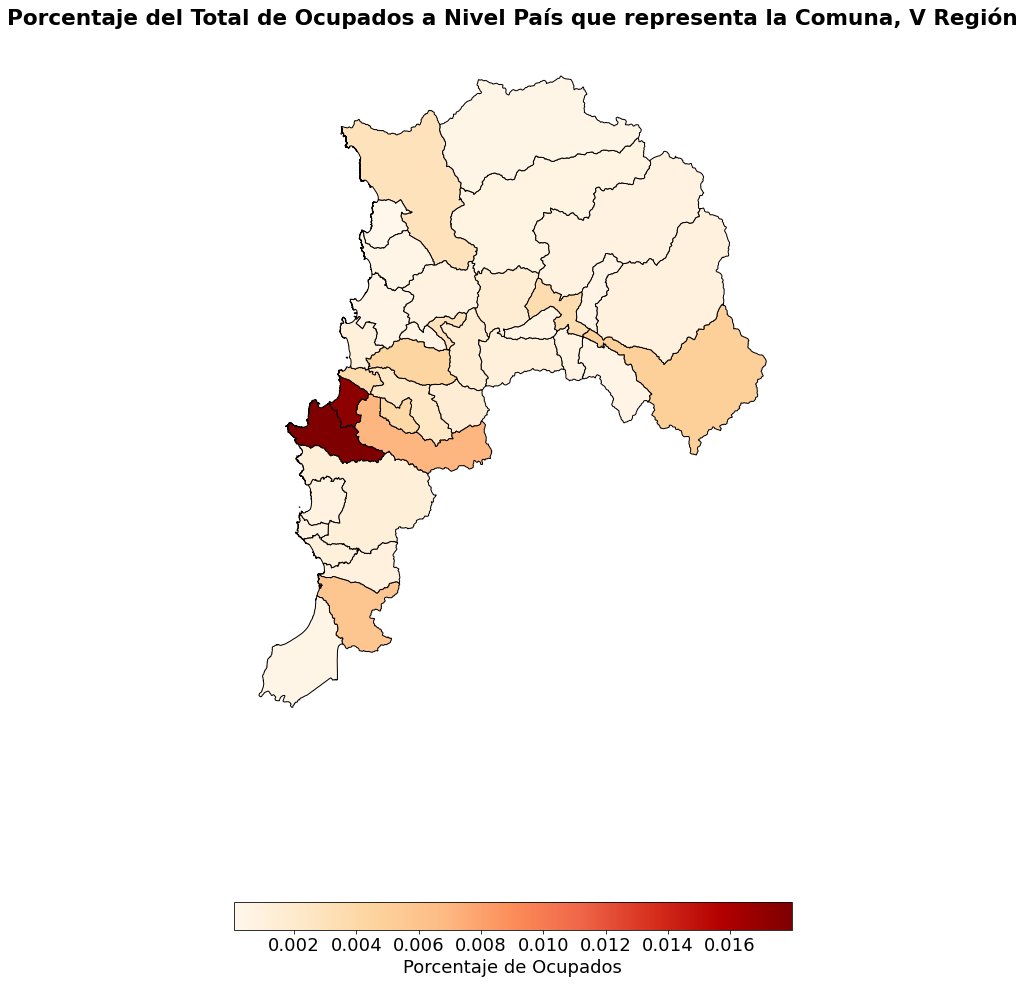

In [48]:
ocupados_nacional2.loc[ocupados_nacional2.Region=="Región de Valparaíso"].plot(column='ponderador_empleo_total',
                                                                                           cmap='OrRd',
                                                                                           legend=True,figsize=(10,20),edgecolor='black',
                                                                              legend_kwds={'label':'Porcentaje de Ocupados','orientation':'horizontal'})
plt.title('Porcentaje del Total de Ocupados a Nivel País que representa la Comuna, V Región',
          fontdict={'fontweight':'bold'},pad=20)
plt.axis('off')
plt.savefig('ocupados_V.png',dpi=300,bbox_inches = 'tight')
plt.show()

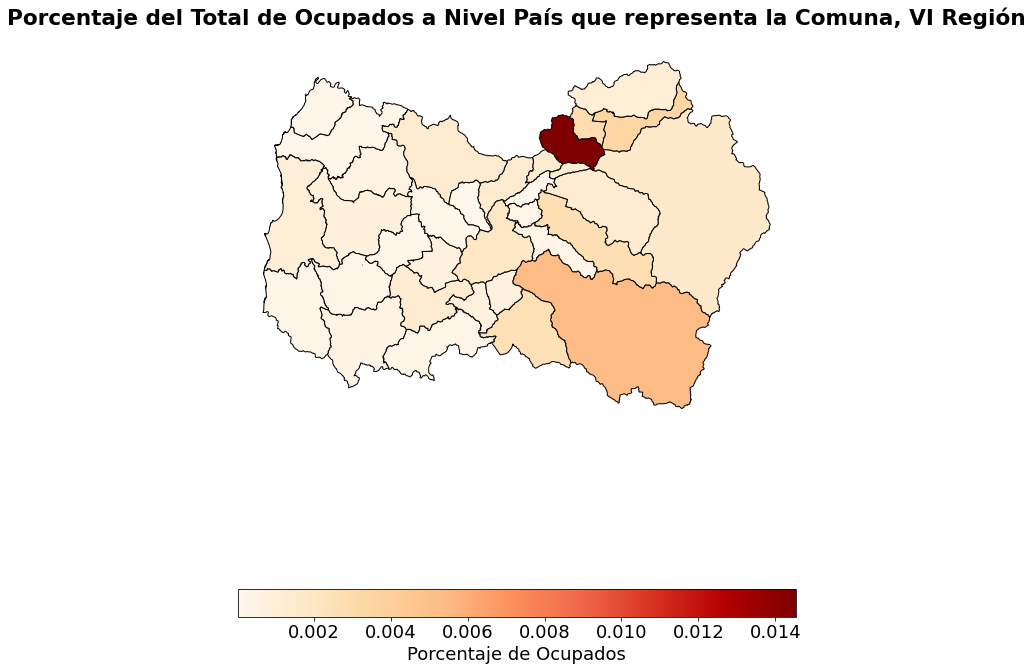

In [50]:
ocupados_nacional2.loc[ocupados_nacional2.Region=="Región del Libertador Bernardo O'Higgins"].plot(column='ponderador_empleo_total',
                                                                                           cmap='OrRd',
                                                                                                  legend=True,figsize=(10,20),edgecolor='black',
                                                                              legend_kwds={'label':'Porcentaje de Ocupados','orientation':'horizontal'})
                                                                                                  
plt.title('Porcentaje del Total de Ocupados a Nivel País que representa la Comuna, VI Región',
          fontdict={'fontweight':'bold'},pad=20)
plt.axis('off')
plt.savefig('ocupados_VI.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [27]:
df6['porcentaje_ocupados_sector_comunal']=df6.factor_expansión/df6.groupby('comuna_trabajo').factor_expansión.sum()

In [28]:
#con df6 tengo los ponderadores por sectores para cada comuna y con ocupados_nacional2 los ponderadores
#para cada comuna sin distinción de sector, lo que representa cada comuna de los ocupados totales

In [29]:
pib_sectores=pd.read_excel('pib21sectores.xlsx')

In [30]:
pib_sectores=pib_sectores.rename(columns={'Unnamed: 0':'sector_económico'})
pib_sectores=pib_sectores.set_index('sector_económico')

In [31]:
pib_sectores=pib_sectores[['PIB_sector','producción_bruta_sector']]

In [32]:
pib_sectores

,PIB_sector,producción_bruta_sector
sector_económico,,
Actividades administrativas y servicios de apoyo,7.086629e+12,1.060745e+13
Actividades de los hogares en calidad de empleadores,0.000000e+00,0.000000e+00
Actividades de organizaciones y órganos extraterritoriales,0.000000e+00,0.000000e+00
Actividades financieras y de seguros,8.129782e+12,1.386316e+13
Actividades inmobiliarias,1.417408e+13,1.834495e+13
"Actividades profesionales, científicas y técnicas",1.063993e+13,1.512513e+13
Administración Pública,8.693942e+12,1.218525e+13
"Agricultura,silvicultura y pesca",7.154579e+12,1.486631e+13
Alojamiento y servicios de comida,3.919671e+12,7.619381e+12


In [33]:
#Multiplico los ponderadores de cada sector de cada comuna y saco el PIB comunal
df6['PIB_Sector']=df6.ponderador_sector*pib_sectores.PIB_sector
df6['Producción_comunal']=df6.ponderador_sector*pib_sectores.producción_bruta_sector
df6=df6[['factor_expansión','ponderador_sector','PIB_Sector','Producción_comunal','porcentaje_ocupados_sector_comunal','geometry']]
df6.head(20)

factor_expansión  \
comuna_trabajo región sector_económico                                                       
Algarrobo      5      Actividades administrativas y servicios de apoyo          823.586111   
                      Actividades de los hogares en calidad de emplea...        436.739767   
                      Actividades inmobiliarias                                 527.042265   
                      Alojamiento y servicios de comida                         319.527230   
                      Artes, entretenimiento y recreación                       860.010426   
                      Comercio                                                 2472.239219   
                      Construcción                                              738.592621   
                      Industria Manufacturera                                   436.739767   
                      Servicios sociales y relacionados con la salud ...        436.739767   
Alhué          13     Actividades de los hogares en calidad de emplea...        267.946739   
                      Actividades profesionales, científicas y técnicas          77.122698   
                      Administración Pública                                    267.946739   
                      Agricultura,silvicultura y pesca                         1224.862058   
                      Alojamiento y servicios de comida                         772.090356   
                      Artes, entretenimiento y recreación                       252.071808   
                      Comercio                                                  772.090356   
                      Construcción                                              391.163248   
                      Enseñanza                                                 772.090356   
                      Explotación de minas y canteras                          3534.964480   
                      Servicios sociales y relacionados con la salud ...        520.018548   

                                                                          ponderador_sector  \
comuna_trabajo región sector_económico                                                        
Algarrobo      5      Actividades administrativas y servicios de apoyo             0.003750   
                      Actividades de los hogares en calidad de emplea...           0.001283   
                      Actividades inmobiliarias                                    0.006655   
                      Alojamiento y servicios de comida                            0.000888   
                      Artes, entretenimiento y recreación                          0.008609   
                      Comercio                                                     0.001578   
                      Construcción                                                 0.001050   
                      Industria Manufacturera                                      0.000485   
                      Servicios sociales y relacionados con la salud ...           0.000987   
Alhué          13     Actividades de los hogares en calidad de emplea...           0.000787   
                      Actividades profesionales, científicas y técnicas            0.000303   
                      Administración Pública                                       0.000582   
                      Agricultura,silvicultura y pesca                             0.001456   
                      Alojamiento y servicios de comida                            0.002146   
                      Artes, entretenimiento y recreación                          0.002523   
                      Comercio                                                     0.000493   
                      Construcción                                                 0.000556   
                      Enseñanza                                                    0.001070   
                      Explotación de minas y canteras                              0.016825   
          

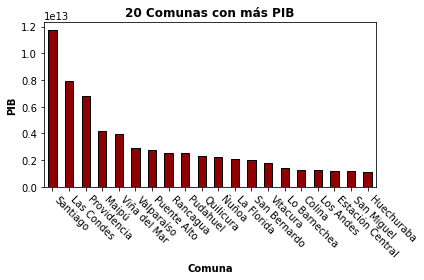

In [34]:
df6.groupby('comuna_trabajo').PIB_Sector.sum().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                                         color='#8F0002',edgecolor='#000000')
plt.title('20 Comunas con más PIB',fontdict={'fontweight':'bold'})
plt.ylabel('PIB',fontdict={'fontweight':'bold'})
plt.xlabel('Comuna',fontdict={'fontweight':'bold'})
plt.xticks(rotation=-45,horizontalalignment='left')
plt.savefig('20_comunas_PIB.png',dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()


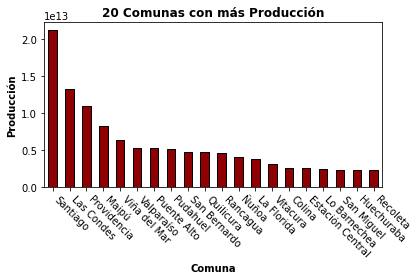

In [35]:
df6.groupby('comuna_trabajo').Producción_comunal.sum().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                                         color='#8F0002',edgecolor='black')
plt.title('20 Comunas con más Producción',fontdict={'fontweight':'bold'})
plt.ylabel('Producción',fontdict={'fontweight':'bold'})
plt.xlabel('Comuna',fontdict={'fontweight':'bold'})
plt.xticks(rotation=-45,horizontalalignment='left')
plt.savefig('20_comunas_Producción.png',dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()


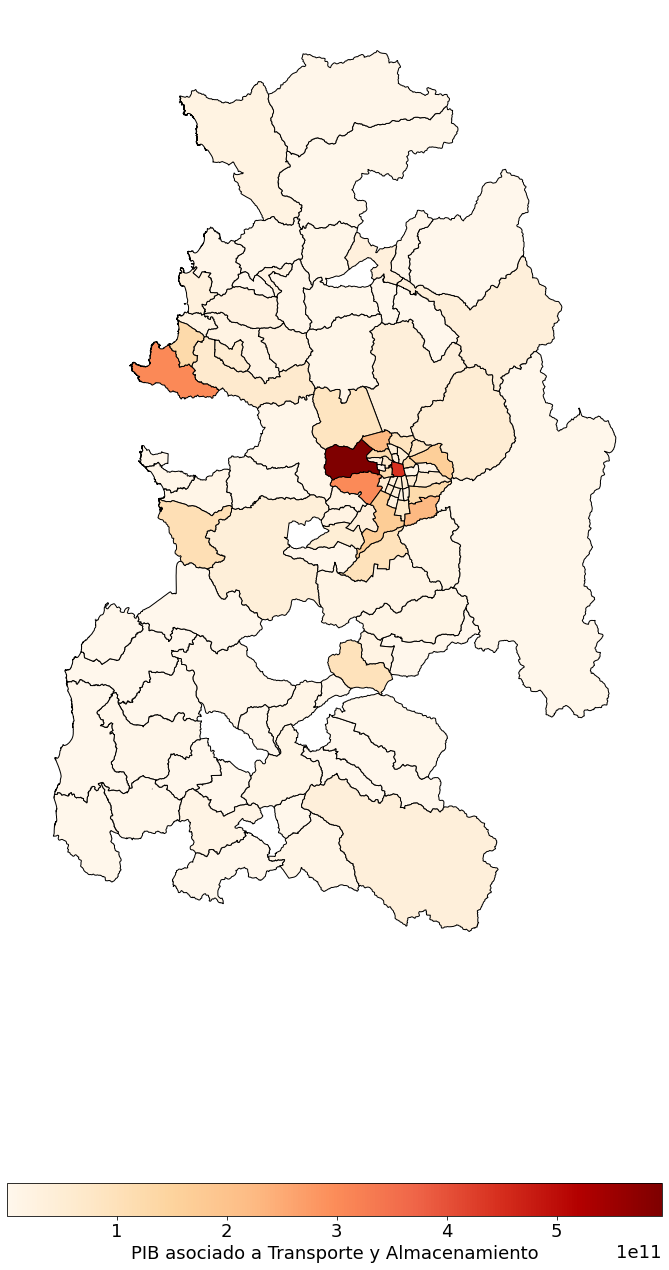

In [47]:
plt.rcParams['font.size'] = 18
df6.xs('Transporte y almacenamiento',level='sector_económico',drop_level=False).plot(column='PIB_Sector',
                                                                                    figsize=(10,20),cmap='OrRd',edgecolor='black',
                                                                                    legend=True,
                                                                                     legend_kwds={'label': "PIB asociado a Transporte y Almacenamiento",'orientation': "horizontal"})
                                                                                                 
plt.tight_layout()
plt.axis('off')
plt.savefig('transporte.png',dpi=300,bbox_inches = 'tight')